In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
# Data handling and processing
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats
import statsmodels.api as sm
from scipy.stats import randint as sp_randint
from time import time

# NLP
import nltk
nltk.download('wordnet')
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package wordnet to C:\Users\SHAIKH
[nltk_data]     SOHEL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\SHAIKH
[nltk_data]     SOHEL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv('tweets.zip')
df

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified
0,7549,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
1,6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
2,6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
3,6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
4,6330,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,11554,2022-08-27 09:37:33.966285+00,Perpetrators Free InSSRCase,1563450246876737536,2022-08-27 08:56:01+00,bunty81t,Prashant Kishor,NaN,44,"RT @SauravS91139716: Good Morning Warrior's,\n...",Delhi,en,62,2010-07-22,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter Web App,False
5228,11555,2022-08-27 09:37:33.96842+00,Perpetrators Free InSSRCase,1563450246373380096,2022-08-27 08:56:00+00,privin07,Preeti🇮🇳 (God➡️Karma🤗🔱🤛🙏💞),God is d ultimate power🌺\nShiva+Shakti🔱🙏\nKris...,3781,RT @GauriSh00526155: @privin07 @IAmApa07 @itsS...,National Capital 🇮🇳,en,4,2009-09-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
5229,11556,2022-08-27 09:37:33.970742+00,Perpetrators Free InSSRCase,1563450245652312064,2022-08-27 08:56:00+00,Justice78602373,Justice For SSR,Fan of Sushant❤️\nSSR Alive in our hearts ❤️ f...,3154,RT @Dipshik37409256: According to SSR's family...,NaN,en,14,2020-07-22,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
5230,11557,2022-08-27 09:37:33.97306+00,Perpetrators Free InSSRCase,1563450243899092993,2022-08-27 08:56:00+00,kundu_ssrian,Koushani Kundu(SSRian),"Proud to be your fan Sushant , proud to be you...",476,RT @rd20082022: Sushant loved life and was pla...,India,en,24,2021-01-07,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       5232 non-null   int64 
 1   hashtag_generation_time  5232 non-null   object
 2   searched_hashtag         5232 non-null   object
 3   tweet_id                 5232 non-null   int64 
 4   tweet_created_at         5232 non-null   object
 5   screen_name              5232 non-null   object
 6   name                     5232 non-null   object
 7   user_description         4274 non-null   object
 8   followers_count          5232 non-null   int64 
 9   tweet                    5232 non-null   object
 10  location                 2587 non-null   object
 11  iso_language_code        5232 non-null   object
 12  retweet_count            5232 non-null   int64 
 13  user_created_at          5232 non-null   object
 14  favorite_count           5232 non-null  

In [6]:
df.isnull().sum()

id                            0
hashtag_generation_time       0
searched_hashtag              0
tweet_id                      0
tweet_created_at              0
screen_name                   0
name                          0
user_description            958
followers_count               0
tweet                         0
location                   2645
iso_language_code             0
retweet_count                 0
user_created_at               0
favorite_count                0
entities                      0
tweet_source                  0
verified                      0
dtype: int64

In [7]:
df['date_hashtag']=pd.to_datetime(df['hashtag_generation_time'])
df['date_tweet']=pd.to_datetime(df['tweet_created_at'])

In [8]:
df.dropna(inplace=True)
df = df.reset_index()
df = df.drop(['hashtag_generation_time','tweet_created_at'], axis = 1) 
df.shape

(2467, 19)

In [9]:
df.fillna(method ='bfill')

,index,id,searched_hashtag,tweet_id,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,date_hashtag,date_tweet
0,1,6327,CBI Unfold D Truth InSSRCase,1563163059002101762,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,2,6328,CBI Unfold D Truth InSSRCase,1563163056934334464,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,3,6329,CBI Unfold D Truth InSSRCase,1563163055390744576,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,4,6330,CBI Unfold D Truth InSSRCase,1563163052102791168,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,6,6332,CBI Unfold D Truth InSSRCase,1563163045748101120,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,Canada,en,3,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,5223,11550,Perpetrators Free InSSRCase,1563450253294333954,meenakshi_hcc,Meenakshi Singh🇮🇳,"Sociologist, Family counsellor. Counsellor in ...",671,RT @sanyal_rima: GOOD MORNING SSR K SSRIANS..🔱...,"New Delhi, India",en,127,2020-07-22,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-27 09:37:33.957405+00:00,2022-08-27 08:56:02+00:00
2463,5224,11551,Perpetrators Free InSSRCase,1563450252761657345,AshishSantosh1,Common Man 🇮🇳,जय श्री राम🚩Proud SSRian\nbackup account @warr...,993,"RT @SauravS91139716: Good Morning Warrior's, \...","Mumbai, India",en,37,2014-04-13,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,2022-08-27 09:37:33.959633+00:00,2022-08-27 08:56:02+00:00
2464,5225,11552,Perpetrators Free InSSRCase,1563450249079037952,Nadiaa_Islam,Nadia,"Self-sufficient. Stay a Mystery, its better.",3068,RT @kundu_koushani: Sushant was betrayed by al...,Bangladesh,en,103,2017-04-05,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-27 09:37:33.961800+00:00,2022-08-27 08:56:01+00:00
2465,5228,11555,Perpetrators Free InSSRCase,1563450246373380096,privin07,Preeti🇮🇳 (God➡️Karma🤗🔱🤛🙏💞),God is d ultimate power🌺\nShiva+Shakti🔱🙏\nKris...,3781,RT @GauriSh00526155: @privin07 @IAmApa07 @itsS...,National Capital 🇮🇳,en,4,2009-09-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,2022-08-27 09:37:33.968420+00:00,2022-08-27 08:56:00+00:00


In [10]:
df.isnull().sum()

index                0
id                   0
searched_hashtag     0
tweet_id             0
screen_name          0
name                 0
user_description     0
followers_count      0
tweet                0
location             0
iso_language_code    0
retweet_count        0
user_created_at      0
favorite_count       0
entities             0
tweet_source         0
verified             0
date_hashtag         0
date_tweet           0
dtype: int64

In [11]:
np.sum(df.isnull().any(axis=1))

0

In [12]:
df.head()

,index,id,searched_hashtag,tweet_id,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,date_hashtag,date_tweet
0,1,6327,CBI Unfold D Truth InSSRCase,1563163059002101762,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,2,6328,CBI Unfold D Truth InSSRCase,1563163056934334464,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,3,6329,CBI Unfold D Truth InSSRCase,1563163055390744576,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,4,6330,CBI Unfold D Truth InSSRCase,1563163052102791168,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,6,6332,CBI Unfold D Truth InSSRCase,1563163045748101120,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,Canada,en,3,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00


<AxesSubplot:xlabel='favorite_count', ylabel='count'>

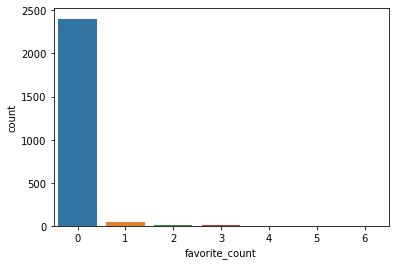

In [13]:
import seaborn as sns
sns.countplot(x = 'favorite_count', data = df)

<AxesSubplot:xlabel='tweet_source', ylabel='count'>

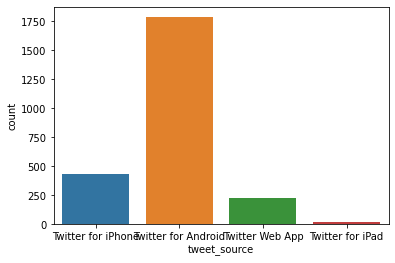

In [14]:
sns.countplot(x = 'tweet_source', data = df)

<AxesSubplot:xlabel='searched_hashtag', ylabel='count'>

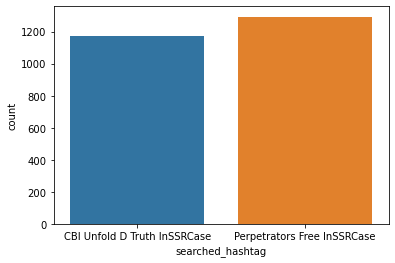

In [15]:
sns.countplot(x = 'searched_hashtag', data = df)

In [16]:
categorical_features = [x for x in df.columns 
                if not (df[x].dtype == np.float64 
                        or df[x].dtype == np.int64)]
print(categorical_features)

['searched_hashtag', 'screen_name', 'name', 'user_description', 'tweet', 'location', 'iso_language_code', 'user_created_at', 'entities', 'tweet_source', 'verified', 'date_hashtag', 'date_tweet']


In [17]:
df["verified"] = df["verified"].astype(int)

In [18]:
df['length']=df['tweet'].apply(len)

In [19]:
df.dtypes

index                              int64
id                                 int64
searched_hashtag                  object
tweet_id                           int64
screen_name                       object
name                              object
user_description                  object
followers_count                    int64
tweet                             object
location                          object
iso_language_code                 object
retweet_count                      int64
user_created_at                   object
favorite_count                     int64
entities                          object
tweet_source                      object
verified                           int32
date_hashtag         datetime64[ns, UTC]
date_tweet           datetime64[ns, UTC]
length                             int64
dtype: object

In [20]:
numerical_features=[x for x in df.columns if df[x].dtype==np.int64 or df[x].dtype==np.float64]
print(numerical_features)

['index', 'id', 'tweet_id', 'followers_count', 'retweet_count', 'favorite_count', 'length']


In [21]:
df.columns

Index(['index', 'id', 'searched_hashtag', 'tweet_id', 'screen_name', 'name',
       'user_description', 'followers_count', 'tweet', 'location',
       'iso_language_code', 'retweet_count', 'user_created_at',
       'favorite_count', 'entities', 'tweet_source', 'verified',
       'date_hashtag', 'date_tweet', 'length'],
      dtype='object')

In [22]:
df['searched_hashtag'].unique()

array(['CBI Unfold D Truth InSSRCase', 'Perpetrators Free InSSRCase'],
      dtype=object)

In [23]:
df['tweet_source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Twitter for iPad'], dtype=object)

In [24]:
df['tweet_id'].unique()

array([1563163059002101762, 1563163056934334464, 1563163055390744576, ...,
       1563450249079037952, 1563450246373380096, 1563450243899092993],
      dtype=int64)

In [25]:
df['iso_language_code'].unique()

array(['en'], dtype=object)

In [26]:
df['favorite_count'].unique()

array([0, 6, 1, 2, 3, 4, 5], dtype=int64)

In [27]:
df['tweet_source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Twitter for iPad'], dtype=object)

In [28]:
df['verified'].unique()

array([0])

In [29]:
df['iso_language_code'].unique()

array(['en'], dtype=object)

In [30]:
df['date_hashtag'].unique()

<DatetimeArray>
['2022-08-26 13:54:52.480426+00:00', '2022-08-26 13:54:52.618819+00:00',
 '2022-08-26 13:54:52.656809+00:00', '2022-08-26 13:54:52.696796+00:00',
 '2022-08-26 13:54:52.796806+00:00', '2022-08-26 13:54:52.837799+00:00',
 '2022-08-26 13:54:52.881808+00:00', '2022-08-26 13:54:52.923808+00:00',
 '2022-08-26 13:54:52.969811+00:00', '2022-08-26 13:54:53.052817+00:00',
 ...
 '2022-08-27 09:37:33.122946+00:00', '2022-08-27 09:37:33.124957+00:00',
 '2022-08-27 09:37:33.943558+00:00', '2022-08-27 09:37:33.953027+00:00',
 '2022-08-27 09:37:33.955089+00:00', '2022-08-27 09:37:33.957405+00:00',
 '2022-08-27 09:37:33.959633+00:00', '2022-08-27 09:37:33.961800+00:00',
 '2022-08-27 09:37:33.968420+00:00', '2022-08-27 09:37:33.973060+00:00']
Length: 2467, dtype: datetime64[ns, UTC]

In [31]:
df.duplicated().sum()

0

In [32]:
df['date_tweet'].unique()

<DatetimeArray>
['2022-08-26 13:54:50+00:00', '2022-08-26 13:54:49+00:00',
 '2022-08-26 13:54:48+00:00', '2022-08-26 13:54:46+00:00',
 '2022-08-26 13:54:45+00:00', '2022-08-26 13:54:42+00:00',
 '2022-08-26 13:54:40+00:00', '2022-08-26 13:54:37+00:00',
 '2022-08-26 13:54:35+00:00', '2022-08-26 13:54:34+00:00',
 ...
 '2022-08-27 08:56:12+00:00', '2022-08-27 08:56:10+00:00',
 '2022-08-27 08:56:08+00:00', '2022-08-27 08:56:06+00:00',
 '2022-08-27 08:56:05+00:00', '2022-08-27 08:56:04+00:00',
 '2022-08-27 08:56:03+00:00', '2022-08-27 08:56:02+00:00',
 '2022-08-27 08:56:01+00:00', '2022-08-27 08:56:00+00:00']
Length: 1913, dtype: datetime64[ns, UTC]

In [33]:
df.head()

,index,id,searched_hashtag,tweet_id,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,date_hashtag,date_tweet,length
0,1,6327,CBI Unfold D Truth InSSRCase,1563163059002101762,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00,140
1,2,6328,CBI Unfold D Truth InSSRCase,1563163056934334464,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00,80
2,3,6329,CBI Unfold D Truth InSSRCase,1563163055390744576,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00,140
3,4,6330,CBI Unfold D Truth InSSRCase,1563163052102791168,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00,81
4,6,6332,CBI Unfold D Truth InSSRCase,1563163045748101120,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,Canada,en,3,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00,83


In [34]:
df.columns

Index(['index', 'id', 'searched_hashtag', 'tweet_id', 'screen_name', 'name',
       'user_description', 'followers_count', 'tweet', 'location',
       'iso_language_code', 'retweet_count', 'user_created_at',
       'favorite_count', 'entities', 'tweet_source', 'verified',
       'date_hashtag', 'date_tweet', 'length'],
      dtype='object')

In [35]:
df['searched_hashtag'].replace(['CBI Unfold D Truth InSSRCase','Perpetrators Free InSSRCase'],['CBI Unfold D Truth','Perpetrators Free'],inplace=True)
df['tweet_source'].replace(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App','Twitter for iPad'],['iPhone','Android','Web App','iPad'],inplace=True)
df['iso_language_code'].replace(['en'],['English'],inplace=True)
df.head()

,index,id,searched_hashtag,tweet_id,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,date_hashtag,date_tweet,length
0,1,6327,CBI Unfold D Truth,1563163059002101762,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,English,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00,140
1,2,6328,CBI Unfold D Truth,1563163056934334464,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,English,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00,80
2,3,6329,CBI Unfold D Truth,1563163055390744576,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,English,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00,140
3,4,6330,CBI Unfold D Truth,1563163052102791168,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,English,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00,81
4,6,6332,CBI Unfold D Truth,1563163045748101120,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,Canada,English,3,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00,83


In [36]:
df = df[['screen_name','name', 'user_description', 'tweet','entities','searched_hashtag','tweet_id','retweet_count','followers_count','location','user_created_at','favorite_count','tweet_source','date_hashtag','date_tweet']]
df.columns = ['Screen_name', 'Name','User_description','Tweet','Entities','Searched_hashtag','label','Retweet_count','Followers_count','Location','User_created_at','Favorite_count','tweet_source','date_hashtag','date_tweet']

In [37]:
df.describe()

,label,Retweet_count,Followers_count,Favorite_count
count,2.467000e+03,2467.000000,2467.000000,2467.000000
mean,1.563313e+18,43.910012,1639.437779,0.047021
std,1.483751e+14,63.113770,1301.285789,0.353723
min,1.563151e+18,0.000000,8.000000,0.000000
25%,1.563158e+18,10.000000,476.000000,0.000000
50%,1.563451e+18,27.000000,1453.000000,0.000000
75%,1.563454e+18,58.000000,2116.000000,0.000000
max,1.563460e+18,779.000000,6251.000000,6.000000


In [38]:
df.head()

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,User_created_at,Favorite_count,tweet_source,date_hashtag,date_tweet
0,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163059002101762,114,1115,Australia,2012-08-21,0,iPhone,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163056934334464,2,2776,Canada,2021-01-01,0,iPhone,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,RT @sushfanseg: Why Rhea Chakraborty's custodi...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163055390744576,6,2006,Earth,2020-10-02,0,Android,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163052102791168,10,2776,Canada,2021-01-01,0,iPhone,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163045748101120,3,2776,Canada,2021-01-01,0,iPhone,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00


In [39]:
# Replacing blank variables with 'unknown' ready for processing
df['Screen_name'].fillna('unknown', inplace=True)
df['Name'].fillna('unknown', inplace=True)
df['User_description'].fillna('unknown', inplace=True)
df['Tweet'].fillna('unknown', inplace=True)
df['Entities'].fillna('unknown', inplace=True)

In [40]:
# Importing SKLearn's list of stopwords and then appending with my own words 
stop = text.ENGLISH_STOP_WORDS

# Basic text cleaning function
def remove_noise(text):
    
    # Make lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    # Remove whitespaces
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))
    
    # Remove special characters
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    
    # Remove punctuation
    text = text.str.replace('[^\w\s]', '')
    
    # Remove numbers
    text = text.str.replace('\d+', '')
    
    # Remove Stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    # Convert to string
    text = text.astype(str)
        
    return text

In [41]:
# Applying noise removal function to data
df['Filtered_Screen_name'] = remove_noise(df['Screen_name'])

df['Filtered_Name'] = remove_noise(df['Name'])

df['Filtered_User_description'] = remove_noise(df['User_description'])

df['Filtered_Tweet'] = remove_noise(df['Tweet'])
df['Filtered_Entities'] = remove_noise(df['Entities'])
df.head()

C:\Users\SHAIKH SOHEL\AppData\Local\Temp\ipykernel_18820\3126299363.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('[^\w\s]', '')
C:\Users\SHAIKH SOHEL\AppData\Local\Temp\ipykernel_18820\3126299363.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('\d+', '')


,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,User_created_at,Favorite_count,tweet_source,date_hashtag,date_tweet,Filtered_Screen_name,Filtered_Name,Filtered_User_description,Filtered_Tweet,Filtered_Entities
0,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163059002101762,114,1115,Australia,2012-08-21,0,iPhone,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00,babypink,alli,justice disha ssr vibes speaks louder words ha...,rt keesain cbi unfold d truth inssrcase truth ...,hashtags symbols user_mentions screen_name kee...
1,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163056934334464,2,2776,Canada,2021-01-01,0,iPhone,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt chintujainhs satyassrian pmoindia doptgoi c...,hashtags symbols user_mentions screen_name chi...
2,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,RT @sushfanseg: Why Rhea Chakraborty's custodi...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163055390744576,6,2006,Earth,2020-10-02,0,Android,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00,its_ssrwarrior,s u p r y,proud fan sushant singh rajput,rt sushfanseg rhea chakrabortys custodial inte...,hashtags symbols user_mentions screen_name sus...
3,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163052102791168,10,2776,Canada,2021-01-01,0,iPhone,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt manisha_ satyassrian pmoindia doptgoi cbi u...,hashtags symbols user_mentions screen_name man...
4,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163045748101120,3,2776,Canada,2021-01-01,0,iPhone,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt purnimasengup satyassrian pmoindia doptgoi ...,hashtags symbols user_mentions screen_name pur...


In [42]:
# Defining a sentiment analyser function
def sentiment_analyser(text):
    return text.apply(lambda Text: pd.Series(TextBlob(Text).sentiment.polarity))

# Applying function to reviews
df['Polarity1'] = sentiment_analyser(df['Filtered_Screen_name'])
df['Polarity 2'] = sentiment_analyser(df['Filtered_Name'])
df['Polarity 3'] = sentiment_analyser(df['Filtered_User_description'])
df['Polarity 4'] = sentiment_analyser(df['Filtered_Tweet'])
df['Polarity 5'] = sentiment_analyser(df['Filtered_Entities'])
df.head(10)

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,...,Filtered_Screen_name,Filtered_Name,Filtered_User_description,Filtered_Tweet,Filtered_Entities,Polarity1,Polarity 2,Polarity 3,Polarity 4,Polarity 5
0,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163059002101762,114,1115,Australia,...,babypink,alli,justice disha ssr vibes speaks louder words ha...,rt keesain cbi unfold d truth inssrcase truth ...,hashtags symbols user_mentions screen_name kee...,0.0,0.0,0.0,0.0,0.8
1,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163056934334464,2,2776,Canada,...,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt chintujainhs satyassrian pmoindia doptgoi c...,hashtags symbols user_mentions screen_name chi...,0.0,0.0,0.0,0.0,0.0
2,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,RT @sushfanseg: Why Rhea Chakraborty's custodi...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163055390744576,6,2006,Earth,...,its_ssrwarrior,s u p r y,proud fan sushant singh rajput,rt sushfanseg rhea chakrabortys custodial inte...,hashtags symbols user_mentions screen_name sus...,0.0,0.0,0.8,0.0,0.0
3,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163052102791168,10,2776,Canada,...,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt manisha_ satyassrian pmoindia doptgoi cbi u...,hashtags symbols user_mentions screen_name man...,0.0,0.0,0.0,0.0,0.0
4,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163045748101120,3,2776,Canada,...,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt purnimasengup satyassrian pmoindia doptgoi ...,hashtags symbols user_mentions screen_name pur...,0.0,0.0,0.0,0.0,0.0
5,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,RT @SSRkaFan: Sushant family and fans are wait...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163044925956097,38,1115,Australia,...,babypink,alli,justice disha ssr vibes speaks louder words ha...,rt ssrkafan sushant family fans waiting update...,hashtags symbols user_mentions screen_name ssr...,0.0,0.0,0.0,0.0,0.0
6,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @Its_GautamRinee: @SatyaSSRian1 @PMOIndia @...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163040044154882,7,2776,Canada,...,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt its_gautamrinee satyassrian pmoindia doptgo...,hashtags symbols user_mentions screen_name its...,0.0,0.0,0.0,0.0,0.0
7,Amrita1224,Amrita Singh Rajput,#Bihari hun aur #Rajput bhi. Kaho ?,RT @MadhumitaroyC: Many a doctrine is like a w...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163039318233092,37,528,"Bengaluru, India",...,amrita,amrita singh rajput,bihari hun aur rajput bhi kaho,rt madhumitaroyc doctrine like window pane tru...,hashtags symbols user_mentions screen_name mad...,0.0,0.0,0.0,0.0,0.0
8,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @SatyaSSRian1: Read full name of Cooper hos...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163027209584643,37,2776,Canada,...,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt satyassrian read cooper hospital hinduhrida...,hashtags symbols user_mentions screen_name sat...

In [43]:
# Instantiate the Word tokenizer & Word lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Define a word lemmatizer function
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# Apply the word lemmatizer function to data
df['Filtered Screen_name'] = df['Filtered_Screen_name'].apply(lemmatize_text)
#df['Filtered_Name'] = df['Filtered_Name'].apply(lemmatize_text)
df['Filtered_User_description'] = df['Filtered_User_description'].apply(lemmatize_text)
df['Filtered_Tweet'] = df['Filtered_Tweet'].apply(lemmatize_text)
df['Filtered_Entities'] = df['Filtered_Entities'].apply(lemmatize_text)
df.head()

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,...,Filtered_Name,Filtered_User_description,Filtered_Tweet,Filtered_Entities,Polarity1,Polarity 2,Polarity 3,Polarity 4,Polarity 5,Filtered Screen_name
0,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163059002101762,114,1115,Australia,...,alli,"[justice, disha, ssr, vibe, speaks, louder, wo...","[rt, keesain, cbi, unfold, d, truth, inssrcase...","[hashtags, symbol, user_mentions, screen_name,...",0.0,0.0,0.0,0.0,0.8,[babypink]
1,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163056934334464,2,2776,Canada,...,tanutoor,"[anshu, anaya, aansh, luv, kokdoo, satya, saur...","[rt, chintujainhs, satyassrian, pmoindia, dopt...","[hashtags, symbol, user_mentions, screen_name,...",0.0,0.0,0.0,0.0,0.0,[tanutoor]
2,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,RT @sushfanseg: Why Rhea Chakraborty's custodi...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163055390744576,6,2006,Earth,...,s u p r y,"[proud, fan, sushant, singh, rajput]","[rt, sushfanseg, rhea, chakrabortys, custodial...","[hashtags, symbol, user_mentions, screen_name,...",0.0,0.0,0.8,0.0,0.0,[its_ssrwarrior]
3,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163052102791168,10,2776,Canada,...,tanutoor,"[anshu, anaya, aansh, luv, kokdoo, satya, saur...","[rt, manisha_, satyassrian, pmoindia, doptgoi,...","[hashtags, symbol, user_mentions, screen_name,...",0.0,0.0,0.0,0.0,0.0,[tanutoor]
4,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163045748101120,3,2776,Canada,...,tanutoor,"[anshu, anaya, aansh, luv, kokdoo, satya, saur...","[rt, purnimasengup, satyassrian, pmoindia, dop...","[hashtags, symbol, user_mentions, screen_name,...",0.0,0.0,0.0,0.0,0.0,[tanutoor]


In [44]:
# Getting a count of words from the documents
# Ngram_range is set to 1,2 - meaning either single or two word combination will be extracted
cvec = CountVectorizer(min_df=.005, max_df=.9, ngram_range=(1,2), tokenizer=lambda doc: doc, lowercase=False)
cvec.fit(df['Filtered_Screen_name'])
cvec.fit(df['Filtered_Name'])
cvec.fit(df['Filtered_User_description'])
cvec.fit(df['Filtered_Tweet'])
cvec.fit(df['Filtered_Entities'])

C:\Users\SHAIKH SOHEL\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(lowercase=False, max_df=0.9, min_df=0.005, ngram_range=(1, 2),
                tokenizer=<function <lambda> at 0x000001F6E57E6940>)

In [45]:
# Getting the total n-gram count
len(cvec.vocabulary_)

602

In [46]:
# Creating the bag-of-words representation

cvec_counts1= cvec.transform(df['Filtered_Screen_name'])
cvec_counts2 = cvec.transform(df['Filtered_Name'])
cvec_counts3= cvec.transform(df['Filtered_User_description'])
cvec_counts4= cvec.transform(df['Filtered_Tweet'])
cvec_counts5= cvec.transform(df['Filtered_Entities'])
p=[cvec_counts1,cvec_counts2,cvec_counts3,cvec_counts4]
for cvec_counts in p:
  print('sparse matrix shape:', cvec_counts.shape)
  print('nonzero count:', cvec_counts.nnz)
  print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (2467, 602)
nonzero count: 6522
sparsity: 0.44%
sparse matrix shape: (2467, 602)
nonzero count: 6953
sparsity: 0.47%
sparse matrix shape: (2467, 602)
nonzero count: 4250
sparsity: 0.29%
sparse matrix shape: (2467, 602)
nonzero count: 8380
sparsity: 0.56%


In [47]:
# Instantiating the TfidfTransformer
transformer = TfidfTransformer()

# Fitting and transforming n-grams
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<2467x602 sparse matrix of type '<class 'numpy.float64'>'
	with 8380 stored elements in Compressed Sparse Row format>

In [48]:
# Getting a list of all n-grams
transformed_weights = transformed_weights.toarray()
vocab = cvec.get_feature_names()

# Putting weighted n-grams into a DataFrame and computing some summary statistics
model = pd.DataFrame(transformed_weights, columns=vocab)
model['Keyword'] = model.idxmax(axis=1)
model['Max'] = model.max(axis=1)
model['Sum'] = model.drop('Max', axis=1).sum(axis=1)
model.tail(10)

C:\Users\SHAIKH SOHEL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SHAIKH SOHEL\AppData\Local\Temp\ipykernel_18820\132129666.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  model['Max'] = model.max(axis=1)
C:\Users\SHAIKH SOHEL\AppData\Local\Temp\ipykernel_18820\132129666.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  model['Sum'] = model.drop('Max', axis=1).sum(axis=1)


,aage,aage cbi,aayush,aayush sr,aayushlr,aayushlr aayush,adnan,adnan ssr,adnanma,adnanma adnan,...,wesaidwhatnow tanvee,withoutthemind,withoutthemind priyanka,y,y id,yasmin,yasmin amn,Keyword,Max,Sum
2457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rajput,0.444395,2.592654
2458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rd,0.842305,1.381306
2459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,aage,0.000000,0.000000
2460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,day,0.908255,1.326672
2461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rd,1.000000,1.000000
2462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k,0.876308,1.358060
2463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,aage,0.000000,0.000000
2464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,kundu_koushani,0.874939,1.359172
2465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,u,0.623548,1.727912
2466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rd,0.842305,1.381306


In [49]:
#merging dataset
# Merging td-idf weight matrix with original DataFrame
model = pd.merge(df, model, left_index=True, right_index=True)

In [50]:
# Printing the first 10 reviews left
model.head(10)

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,...,wesaidwhatnow tanvee,withoutthemind,withoutthemind priyanka,y,y id,yasmin,yasmin amn,Keyword,Max,Sum
0,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163059002101762,114,1115,Australia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,keesain,0.851488,1.583616
1,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163056934334464,2,2776,Canada,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,satyassrian,0.720038,1.903214
2,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,RT @sushfanseg: Why Rhea Chakraborty's custodi...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163055390744576,6,2006,Earth,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sushfanseg,0.679040,1.920593
3,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163052102791168,10,2776,Canada,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,manisha_,0.622216,2.112139
4,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163045748101120,3,2776,Canada,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,satyassrian,0.720038,1.903214
5,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,RT @SSRkaFan: Sushant family and fans are wait...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163044925956097,38,1115,Australia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ssr,0.603931,2.075951
6,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @Its_GautamRinee: @SatyaSSRian1 @PMOIndia @...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163040044154882,7,2776,Canada,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,satyassrian,0.720038,1.903214
7,Amrita1224,Amrita Singh Rajput,#Bihari hun aur #Rajput bhi. Kaho ?,RT @MadhumitaroyC: Many a doctrine is like a w...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163039318233092,37,528,"Bengaluru, India",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,madhumitaroyc,0.896607,1.339434
8,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @SatyaSSRian1: Read full name of Cooper hos...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163027209584643,37,2776,Canada,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dr,0.834417,1.385551
9,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @SatyaSSRian1: Dr. Kesari Chavda &amp; Mahe...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163020716830725,39,2776,Canada,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dr,0.949558,1.263150


In [51]:
#Getting a view of the top 20 occurring words
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'Term': cvec.get_feature_names(), 'Occurrences': occ})
counts_df.sort_values(by='Occurrences', ascending=False).head(25)

C:\Users\SHAIKH SOHEL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Term,Occurrences
55,cbi,1035
322,pmoindia,717
550,sushant,555
195,justice,496
526,ssr,406
89,doptgoi,341
174,ips_nupurprasad,330
143,hmoindia,302
172,ips_association,261
495,singh,190


In [52]:
# Getting a view of the top 20 weights
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'Term': cvec.get_feature_names(), 'Weight': weights})
weights_df.sort_values(by='Weight', ascending=False).head(25)

C:\Users\SHAIKH SOHEL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Term,Weight
55,cbi,0.137557
322,pmoindia,0.085786
550,sushant,0.077579
195,justice,0.073579
526,ssr,0.065011
89,doptgoi,0.054841
174,ips_nupurprasad,0.054338
143,hmoindia,0.041762
487,sheetaly,0.041147
172,ips_association,0.039448


In [53]:
df.head(1)

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,...,Filtered_Name,Filtered_User_description,Filtered_Tweet,Filtered_Entities,Polarity1,Polarity 2,Polarity 3,Polarity 4,Polarity 5,Filtered Screen_name
0,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163059002101762,114,1115,Australia,...,alli,"[justice, disha, ssr, vibe, speaks, louder, wo...","[rt, keesain, cbi, unfold, d, truth, inssrcase...","[hashtags, symbol, user_mentions, screen_name,...",0.0,0.0,0.0,0.0,0.8,[babypink]


C:\Users\SHAIKH SOHEL\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


476     159
2776    154
2003    121
340     113
1089     92
       ... 
207       1
225       1
1027      1
2120      1
8         1
Name: Followers_count, Length: 167, dtype: int64


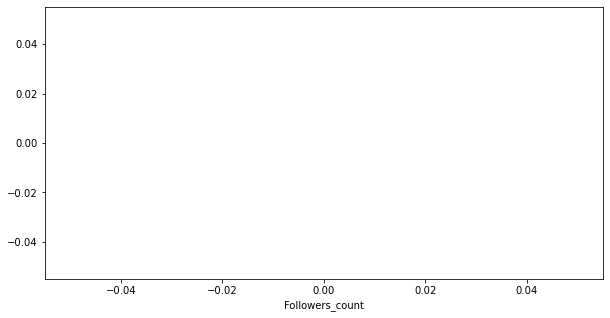

In [54]:
# Plotting overall recommendations and getting value counts
fig = plt.figure(figsize = (10,5))
sns.lineplot(x='Followers_count', data = model)
print(df['Followers_count'].value_counts())

Followers_count
8       0.000000
9       0.000000
22     -0.014286
26      0.000000
27      0.500000
          ...   
4935    0.243182
4936    0.289541
5746    0.287500
6047    0.232643
6251    0.500000
Name: Polarity 4, Length: 167, dtype: float64

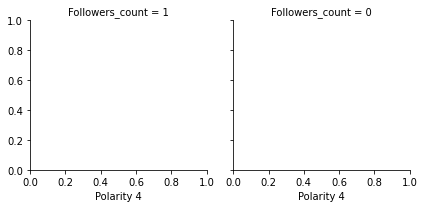

In [55]:
# Visualising polarity between recommending and non-recommending customers, then getting value counts
g = sns.FacetGrid(model, col="Followers_count", col_order=[1, 0])
g = g.map(plt.hist, "Polarity 4", bins=20, color="g")

recommend = model.groupby(['Followers_count'])
recommend['Polarity 4'].mean()

In [57]:
print('Creating the bag of words...')
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 5000)
# fit_transform() does two functions: First, it fits the model
# and learns the vocaulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
train_data_features = vectorizer.fit_transform(df)

# Numpy arrays are easy to work with, so convert the result to an array
train_data_features = train_data_features.toarray()
print('Bag of words completed')

Creating the bag of words...
Bag of words completed


In [58]:
df.head()

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,...,Filtered_Name,Filtered_User_description,Filtered_Tweet,Filtered_Entities,Polarity1,Polarity 2,Polarity 3,Polarity 4,Polarity 5,Filtered Screen_name
0,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163059002101762,114,1115,Australia,...,alli,"[justice, disha, ssr, vibe, speaks, louder, wo...","[rt, keesain, cbi, unfold, d, truth, inssrcase...","[hashtags, symbol, user_mentions, screen_name,...",0.0,0.0,0.0,0.0,0.8,[babypink]
1,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163056934334464,2,2776,Canada,...,tanutoor,"[anshu, anaya, aansh, luv, kokdoo, satya, saur...","[rt, chintujainhs, satyassrian, pmoindia, dopt...","[hashtags, symbol, user_mentions, screen_name,...",0.0,0.0,0.0,0.0,0.0,[tanutoor]
2,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,RT @sushfanseg: Why Rhea Chakraborty's custodi...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163055390744576,6,2006,Earth,...,s u p r y,"[proud, fan, sushant, singh, rajput]","[rt, sushfanseg, rhea, chakrabortys, custodial...","[hashtags, symbol, user_mentions, screen_name,...",0.0,0.0,0.8,0.0,0.0,[its_ssrwarrior]
3,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163052102791168,10,2776,Canada,...,tanutoor,"[anshu, anaya, aansh, luv, kokdoo, satya, saur...","[rt, manisha_, satyassrian, pmoindia, doptgoi,...","[hashtags, symbol, user_mentions, screen_name,...",0.0,0.0,0.0,0.0,0.0,[tanutoor]
4,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163045748101120,3,2776,Canada,...,tanutoor,"[anshu, anaya, aansh, luv, kokdoo, satya, saur...","[rt, purnimasengup, satyassrian, pmoindia, dop...","[hashtags, symbol, user_mentions, screen_name,...",0.0,0.0,0.0,0.0,0.0,[tanutoor]


In [59]:
vocab = vectorizer.get_feature_names()
print(vocab)

['date_hashtag', 'date_tweet', 'entities', 'favorite_count', 'filtered', 'filtered_entities', 'filtered_name', 'filtered_screen_name', 'filtered_tweet', 'filtered_user_description', 'followers_count', 'label', 'location', 'name', 'polarity', 'polarity1', 'retweet_count', 'screen_name', 'searched_hashtag', 'tweet', 'tweet_source', 'user_created_at', 'user_description']


C:\Users\SHAIKH SOHEL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)

1 date_hashtag
1 date_tweet
1 entities
1 favorite_count
1 filtered
1 filtered_entities
1 filtered_name
1 filtered_screen_name
1 filtered_tweet
1 filtered_user_description
1 followers_count
1 label
1 location
1 name
4 polarity
1 polarity1
1 retweet_count
2 screen_name
1 searched_hashtag
1 tweet
1 tweet_source
1 user_created_at
1 user_description
